In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = 'bank-additional-full.csv'
df = pd.read_csv(file, sep = ';')


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
print(df)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  

In [44]:
df.groupby('y').mean()
# Number of success is very low compared to failures. 36548 = 0 and 4640 = 1
# columns have missing values of unknown or nonexistent values.

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [45]:
#check for missing values 
print(df.info())
df.isnull().any().any()

#No values are missing. No steps were taken to fill missing values. There are however, 'unknown' 
#categories within variables which may need to be addressed later on. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

False

In [46]:
#job marital unknown

#df_unknown_job = df[df.job == 'unknown']
#print(df['job'].value_counts(dropna=False))
#print(df['marital'].value_counts(dropna=False))
#print(df['education'].value_counts(dropna=False))

#print(df_unknown_job)

df = df.rename(columns = {'emp.var.rate':'emp_var_rate', 'cons.price.idx':'cons_price_idx', 
                          'cons.conf.idx':'cons_conf_idx','nr.employed':'nr_employed'})
print(df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

(41188, 21)

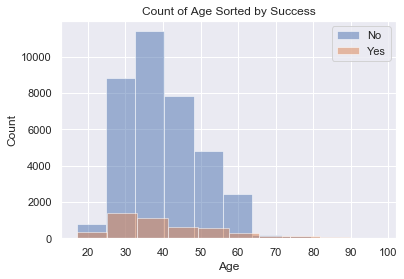

In [47]:
sns.set(style = 'darkgrid')
yes = df[df['y'] == 'yes']
no = df[df['y'] == 'no']
ax = plt.hist(x = 'age', alpha = 0.5, data = no)
ax = plt.hist(x = 'age', alpha = 0.5, data = yes)
ax = plt.title('Count of Age Sorted by Success')
ax = plt.legend(['No', 'Yes'])
ax = plt.xlabel('Age')
ax = plt.ylabel('Count')
plt.savefig('agecount.png')
plt.show()

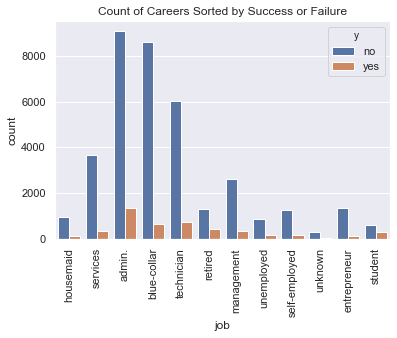

In [48]:
#early data analysis 
ax = sns.countplot(x = 'job', hue = 'y', data = df)
ax.set_title('Count of Careers Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.savefig('careers.png')
plt.show()


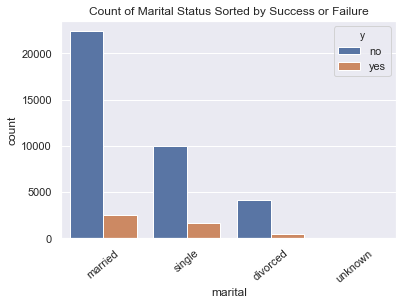

In [49]:
ax = sns.countplot(x = 'marital', hue = 'y', data = df)
ax.set_title('Count of Marital Status Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
plt.show()

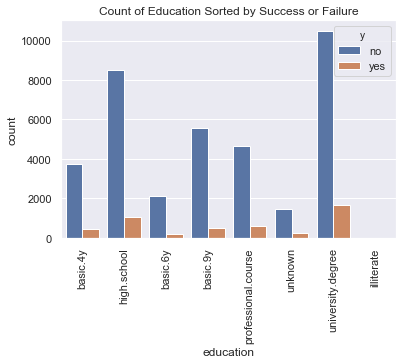

In [50]:
ax = sns.countplot(x = 'education', hue = 'y', data = df)
ax.set_title('Count of Education Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

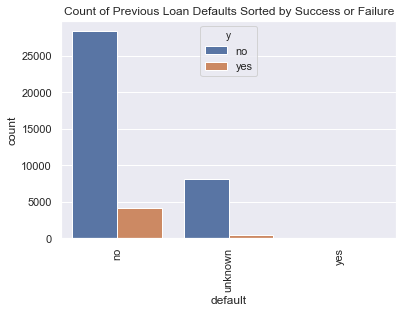

In [51]:
ax = sns.countplot(x = 'default', hue = 'y', data = df)
ax.set_title('Count of Previous Loan Defaults Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

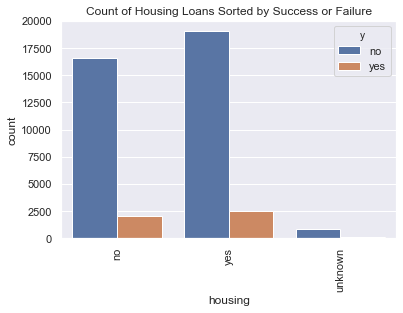

In [52]:
ax = sns.countplot(x = 'housing', hue = 'y', data = df)
ax.set_title('Count of Housing Loans Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

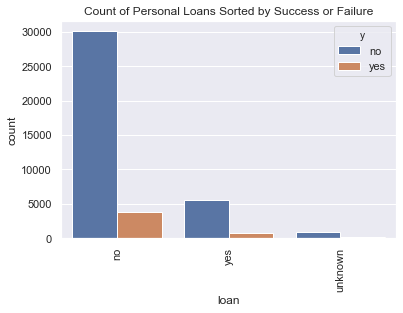

In [53]:
ax = sns.countplot(x = 'loan', hue = 'y', data = df)
ax.set_title('Count of Personal Loans Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

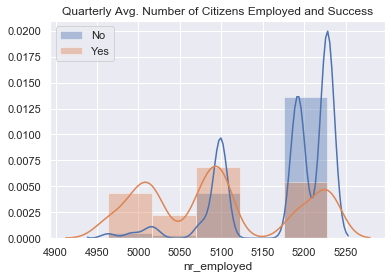

In [54]:
yes = df[df.y == 'yes']
no = df[df.y == 'no']

sns.distplot(no.nr_employed, bins = 5, label = 'No')
sns.distplot(yes.nr_employed, bins = 5, label = 'Yes')
plt.title('Quarterly Avg. Number of Citizens Employed and Success')
plt.legend()
plt.savefig('nremployed.png')
plt.show()

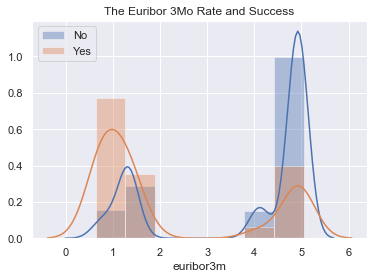

In [55]:
yes = df[df.y == 'yes']
no = df[df.y == 'no']

sns.distplot(no.euribor3m, bins = 7, label = 'No')
sns.distplot(yes.euribor3m, bins = 7, label = 'Yes')
plt.title('The Euribor 3Mo Rate and Success')
plt.legend()
plt.savefig('euribor3m.png')
plt.show()


In [56]:
#Descriptive Statistics 

yes.describe()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000
mean,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991
std,13.837476,401.171871,1.666245,403.407181,0.860344,1.623626,0.676644,6.139668,1.742598,87.572641
min,17.000000,37.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,253.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.849000,5017.500000
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000
75%,50.000000,741.250000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.406000,5191.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [57]:
no.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000
mean,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
std,9.898132,207.096293,2.873438,120.656868,0.409199,1.482932,0.558993,4.391155,1.638187,64.571979
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,95.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.405000,5099.100000
50%,38.000000,163.500000,2.000000,999.000000,0.000000,1.100000,93.918000,-41.800000,4.857000,5195.800000
75%,47.000000,279.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000
max,95.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


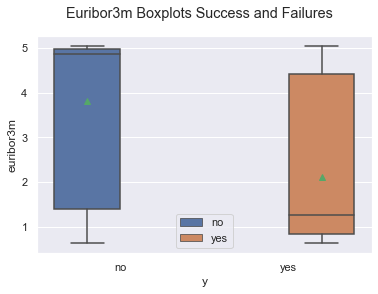

In [58]:
plt.plot()
sns.boxplot(y = 'euribor3m', x = 'y', data = df, hue = 'y', showmeans = True)
plt.legend(loc = 'lower center')
plt.suptitle('Euribor3m Boxplots Success and Failures')
plt.savefig('euriborboxplot.png')
plt.show()

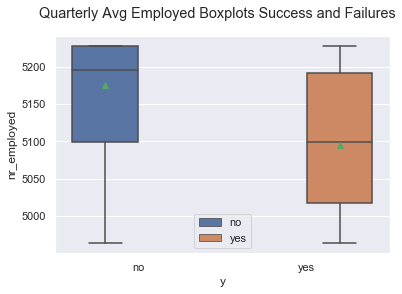

In [59]:
plt.figure()
sns.boxplot(y = 'nr_employed', x = 'y', data = df, hue = 'y', showmeans = True)
plt.legend(loc = 'lower center')
plt.suptitle('Quarterly Avg Employed Boxplots Success and Failures')
plt.savefig('employmentboxplot.png')
plt.show()

In [60]:
#descriptive t test euribor
meanyes = yes.euribor3m.mean()
meanno = no.euribor3m.mean()
stdyes = np.std(yes.euribor3m)
stdno = np.std(no.euribor3m)

#Given our sample sizes for both groups are high know our degrees of freedom and alpha = 0.05
#gives us a tcritical value of 1.96 two tailed test

#standard error
se = np.sqrt((stdyes**2/ len(yes)) + (stdno**2 / len(no)))
tstat = (meanyes-meanno)/se
tstat


-62.586022933524184

In [61]:
#descriptive t test employment numbers
meanyes = yes.nr_employed.mean()
meanno = no.nr_employed.mean()
stdyes = np.std(yes.nr_employed)
stdno = np.std(no.nr_employed)

#Given our sample sizes for both groups are high know our degrees of freedom and alpha = 0.05
#gives us a tcritical value of 1.96 two tailed test

#standard error
se = np.sqrt((stdyes**2/ len(yes)) + (stdno**2 / len(no)))
tstat = (meanyes-meanno)/se
tstat

-60.981357063962115

In [62]:
#perform correlation test

In [63]:
#apply machine learning 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing


In [64]:
# Job and Marital status encoding. 
categorical_features = ['job', 'marital']
data1 = df

enc_job = preprocessing.OneHotEncoder()
job_enc = enc_job.fit_transform(df.job.values.reshape(-1,1)).toarray()
job_enc = pd.DataFrame(job_enc, columns = ['job_'+enc_job.categories_[0][int(i)]
                                        for i in range(job_enc.shape[1])])
data1 = pd.concat([df, job_enc], axis=1)

enc_mar = preprocessing.OneHotEncoder()
mar_enc = enc_mar.fit_transform(df.marital.values.reshape(-1,1)).toarray()
mar_enc = pd.DataFrame(mar_enc, columns = ['mar_'+ enc_mar.categories_[0][int(i)]
                                        for i in range(mar_enc.shape[1])])
data1 = pd.concat([data1,mar_enc], axis=1)

#print(data1)

In [65]:
#Encode housing/loan/default variables. Do they have housing loan/personal loan/or previous 
#credit default? no/0 yes/1 unknown/2

#print(df.loan.value_counts())

encoder = preprocessing.OrdinalEncoder(categories=[['unknown', 'yes', 'no']])
data1['housingenc'] = encoder.fit_transform(data1.housing.values.reshape(-1,1))
data1['defaultenc'] = encoder.fit_transform(data1.default.values.reshape(-1,1))
data1['loanenc'] = encoder.fit_transform(data1.loan.values.reshape(-1,1))

#Education Encoding
encoder = preprocessing.OrdinalEncoder(categories=[['unknown','illiterate','basic.4y', 'basic.6y',
                                                    'basic.9y', 'high.school','professional.course',
                                                    'university.degree']])
data1['educationenc'] = encoder.fit_transform(data1.education.values.reshape(-1,1))

#print(df.day_of_week.value_counts())
#Encode Month and day of the week variables
encoder = preprocessing.OrdinalEncoder(categories=[['jan', 'feb','mar','apr','may','jun','jul',
                                                   'aug','sep','oct','nov','dec']])
data1['monthenc'] = encoder.fit_transform(data1.month.values.reshape(-1,1))

encoder = preprocessing.OrdinalEncoder(categories=[['mon','tue','wed','thu','fri']])
data1['dayofweekenc'] = encoder.fit_transform(data1.day_of_week.values.reshape(-1,1))
#print(data1)

In [66]:
#Contact method Encoding cellular/0 or telephone/1

le = preprocessing.LabelEncoder()
contact_method= le.fit_transform(df.contact)
contact_method = pd.DataFrame(contact_method, columns = ['contact_method'])
data1['contact_method'] = contact_method

#previvous marketing campaign outcome, nonexistent/0, failure/1, success/2
encoder = preprocessing.OrdinalEncoder(categories=[['nonexistent', 'failure', 'success']])
data1['previouscamp'] = encoder.fit_transform(df.poutcome.values.reshape(-1,1))

#target variable encoding no/0 yes/1
yes = le.fit_transform(df.y)
data1['yes'] = pd.DataFrame(yes)

print(data1.head())
print(data1.columns)

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  mar_unknown  housingenc  defaultenc  loanenc  \
0   may         mon  ...          0.0         2.0         2.0      2.0   
1   may         mon  ...          0.0         2.0         0.0      2.0   
2   may         mon  ...          0.0         1.0         2.0      2.0   
3   may         mon  ...          0.0         2.0         2.0      2.0   
4   may         mon  ...          0.0         2.0         2.0      1.0   

  educationenc  monthenc  dayofweekenc  contact_method  previouscamp  yes  
0          2.0       4

In [67]:
#Remove all uneccesary object variables, split into dependent and independent variables.
data1.info()
data2 = data1.select_dtypes(exclude= 'object')
data2 = data2.drop(['yes','duration'], axis = 1)
target_var = data1['yes']

data2.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 46 columns):
age                  41188 non-null int64
job                  41188 non-null object
marital              41188 non-null object
education            41188 non-null object
default              41188 non-null object
housing              41188 non-null object
loan                 41188 non-null object
contact              41188 non-null object
month                41188 non-null object
day_of_week          41188 non-null object
duration             41188 non-null int64
campaign             41188 non-null int64
pdays                41188 non-null int64
previous             41188 non-null int64
poutcome             41188 non-null object
emp_var_rate         41188 non-null float64
cons_price_idx       41188 non-null float64
cons_conf_idx        41188 non-null float64
euribor3m            41188 non-null float64
nr_employed          41188 non-null float64
y                    41188 non-

Index(['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'mar_divorced', 'mar_married', 'mar_single', 'mar_unknown',
       'housingenc', 'defaultenc', 'loanenc', 'educationenc', 'monthenc',
       'dayofweekenc', 'contact_method', 'previouscamp'],
      dtype='object')

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

#Split data into train test groups. 
X_train, X_test, y_train, y_test = train_test_split(data2, target_var, 
                                                    test_size = 0.3,
                                                   random_state = 42)
#Run randomforest classifier. 
clf = RandomForestClassifier(n_estimators = 1000,
                             max_depth = 5,
                            random_state = 42)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_predicted)
print('Random Forest has an accuracy of: %.3f' % accuracy)


Random Forest has an accuracy of: 0.900


In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)

clf = RandomForestClassifier(random_state = 42)

parameters = {
    'n_estimators': [100, 500, 1000, 1500],
    'max_depth': [3, 5, 10, 20]
}

cv_clf = GridSearchCV(estimator=clf, param_grid= parameters, cv = 5, scoring = 'roc_auc')

results = cv_clf.fit(data2, target_var)
results1 = results.cv_results_
best_ = results.best_params_

In [110]:
results1 = pd.DataFrame(results1)
print(results1)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.760457      0.027233         0.046125        0.004552   
1        3.675900      0.070551         0.217461        0.007906   
2        7.401318      0.108463         0.448520        0.036168   
3       11.612564      0.360104         0.704825        0.042999   
4        1.172324      0.071953         0.060055        0.005874   
5        5.267503      0.471750         0.245814        0.011317   
6       10.086131      0.122668         0.479088        0.013576   
7       15.331570      0.445306         0.768154        0.059280   
8        1.565879      0.041861         0.064457        0.004732   
9        7.775145      0.229832         0.309605        0.039394   
10      15.523089      0.432797         0.585141        0.053998   
11      23.306213      0.613655         0.886239        0.078142   
12       2.419851      0.091114         0.080884        0.020974   
13      12.070025      0.406827         0.396657

In [113]:
#Run randomforest classifier. 
clf = RandomForestClassifier(n_estimators = 500,
                             max_depth = 3, 
                            random_state = 42)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_predicted)
print('Random Forest has an accuracy of: %.3f' % accuracy)


from sklearn.tree import export_graphviz

#export as dot file
estimator = clf.estimators_[50]
export_graphviz(estimator, out_file = 'a3100tree.dot',
                feature_names = data2.columns,
                rounded = False)


!dot -Tpng a3100tree.dot -o a3100tree.png

from IPython.display import Image
Image(filename = 'a3100tree.png')

Random Forest has an accuracy of: 0.898


ValueError: Length of feature_names, 33 does not match number of features, 23

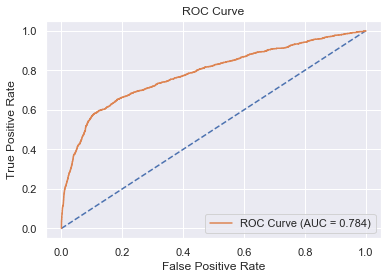

In [114]:
#calculate roc and auc 

#Predict probabilities keeping positive outcomes only
y_pred_proba = clf.predict_proba(X_test)[:,1]

#Calculate the AUC
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#Calculate roc curve 
fpr_clf, tpr_clf, _ = metrics.roc_curve(y_test, y_pred_proba)

_ = plt.plot([0,1],[0,1], linestyle = '--')
_ = plt.plot(fpr_clf, tpr_clf, label = 'ROC Curve (AUC = %.3f)' 
             % auc)
_ = plt.title('ROC Curve')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.legend(loc = 'lower right')
_ = plt.savefig('clfROC')
_ = plt.show()



f1: 0.270 ap: 0.441


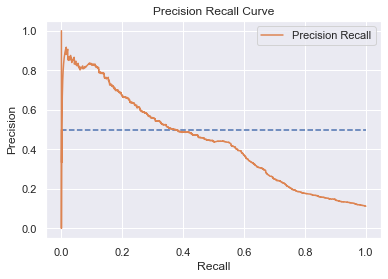

In [73]:
#precision recall curves
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)

#f1 score 
f1 = metrics.f1_score(y_test, y_predicted)
#auc of precision recall
PRauc = metrics.auc(recall, precision)
#average precision score
ap = metrics.average_precision_score(y_test, y_pred_proba)

print('f1: %.3f ap: %.3f' % (f1, ap))

_ = plt.plot([0,1],[0.5,0.5], linestyle = '--')
_ = plt.plot(recall, precision, label = 'Precision Recall' 
             % PRauc)
_ = plt.title('Precision Recall Curve')
_ = plt.xlabel('Recall')
_ = plt.ylabel('Precision')
_ = plt.legend(loc = 'best')
_ = plt.savefig('CLFPrec_Recall')
_ = plt.show()

In [74]:
treesoutput = open('regoutput', 'w')
feature_importance = pd.Series(clf.feature_importances_, 
                               index = data2.columns).sort_values(ascending=False)
print(feature_importance)
print(feature_importance[0:10], file = treesoutput)

euribor3m            0.229407
nr_employed          0.198787
pdays                0.141971
previouscamp         0.132129
emp_var_rate         0.086354
cons_conf_idx        0.071493
cons_price_idx       0.042659
monthenc             0.023152
previous             0.022377
contact_method       0.014926
age                  0.011165
defaultenc           0.007132
job_student          0.006163
job_retired          0.004387
job_blue-collar      0.002100
dayofweekenc         0.001738
educationenc         0.001501
campaign             0.001215
mar_single           0.000450
job_admin.           0.000154
mar_divorced         0.000127
job_unknown          0.000103
job_technician       0.000092
housingenc           0.000088
job_services         0.000068
job_unemployed       0.000057
job_management       0.000052
mar_unknown          0.000043
loanenc              0.000034
mar_married          0.000032
job_entrepreneur     0.000023
job_housemaid        0.000023
job_self-employed    0.000000
dtype: flo

In [111]:
#remove features with less than 0.01 importance.

cols = ['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar','job_technician',
       'mar_divorced', 'mar_married', 'mar_single',
       'housingenc', 'defaultenc', 'loanenc', 'educationenc', 'monthenc',
       'dayofweekenc', 'contact_method', 'previouscamp']

#rerun analysis
#Split data into train test groups. 
X_train, X_test, y_train, y_test = train_test_split(data2[cols], target_var, 
                                                    test_size = 0.3,
                                                   random_state = 42)
#Run randomforest classifier. 
clf = RandomForestClassifier(n_estimators = 1000,
                             max_depth = 5, 
                            random_state = 42)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_predicted)
print('Random Forest has an accuracy of: %.3f' % accuracy)

Random Forest has an accuracy of: 0.900


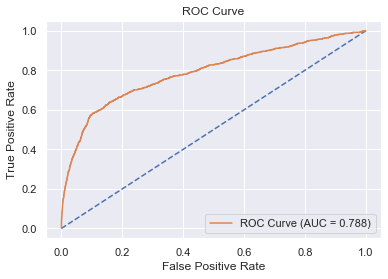

In [112]:
#Predict probabilities keeping positive outcomes only
y_pred_proba = clf.predict_proba(X_test)[:,1]

#Calculate the AUC
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#Calculate roc curve 
fpr_clf, tpr_clf, _ = metrics.roc_curve(y_test, y_pred_proba)

_ = plt.plot([0,1],[0,1], linestyle = '--')
_ = plt.plot(fpr_clf, tpr_clf, label = 'ROC Curve (AUC = %.3f)' 
             % auc)
_ = plt.title('ROC Curve')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.legend(loc = 'lower right')
_ = plt.show()

6.015
Random Forest has an accuracy of: 0.900


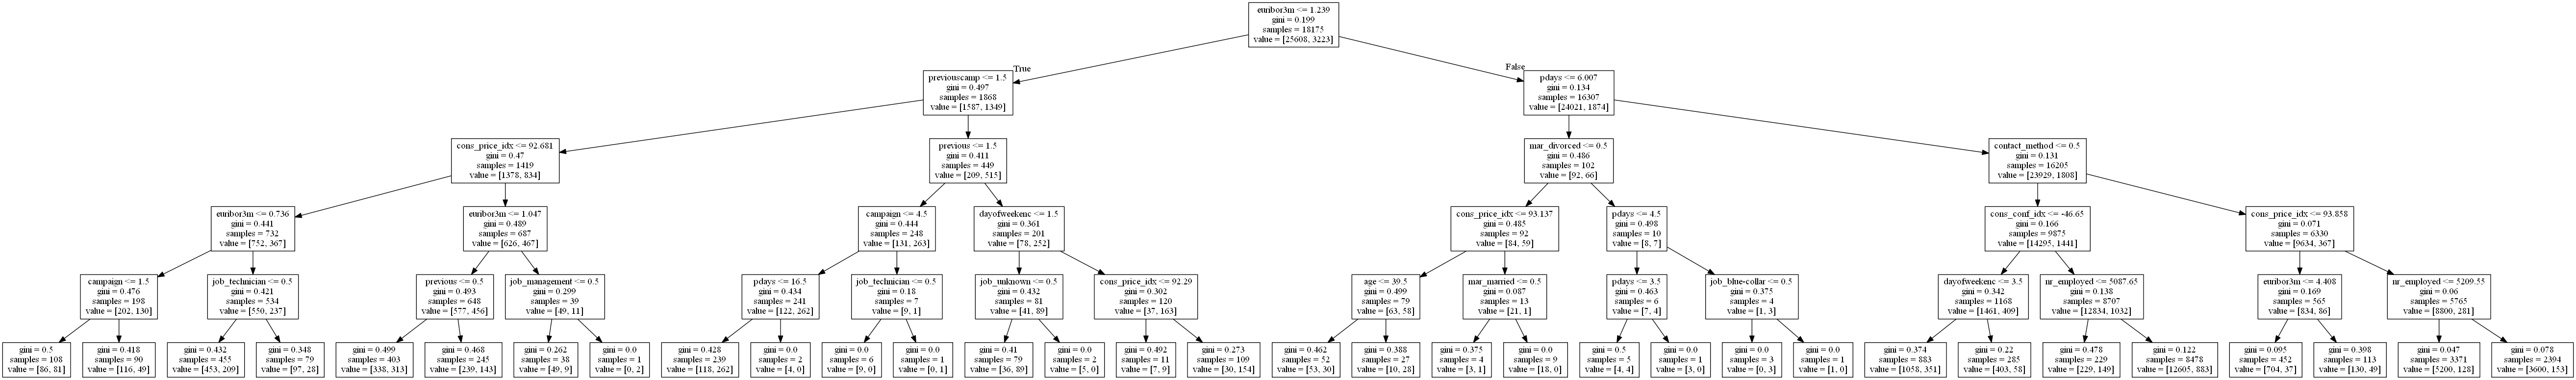

In [77]:
pdayscounts = pd.DataFrame(df.pdays.value_counts())

#calculate average number of days passed between previous campaign contact
pdaysaverage = df[df.pdays < 999].mean()
print('%.3f' % pdaysaverage.pdays)

#social_economic = df[['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
#print(social_economic['nr.employed'].value_counts())

data2['pdays'] = data2['pdays'].replace(999, 6.015)

#Split data into train test groups. 
X_train, X_test, y_train, y_test = train_test_split(data2, target_var, 
                                                    test_size = 0.3,
                                                   random_state = 42)
#Run randomforest classifier. 
clf = RandomForestClassifier(n_estimators = 1000,
                             max_depth = 5,
                            random_state = 42)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_predicted)
print('Random Forest has an accuracy of: %.3f' % accuracy)

feature_importance = pd.Series(clf.feature_importances_, 
                               index = data2.columns).sort_values(ascending=False)
feature_importance


from sklearn.tree import export_graphviz

#export as dot file
estimator = clf.estimators_[50]
export_graphviz(estimator, out_file = 'tree.dot',
                feature_names = data2.columns,
                rounded = False)


!dot -Tpng tree.dot -o tree.png

from IPython.display import Image
Image(filename = 'tree.png')


In [78]:
data1['pdays'] = data1['pdays'].replace(999, 6.015)
data1.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,mar_unknown,housingenc,defaultenc,loanenc,educationenc,monthenc,dayofweekenc,contact_method,previouscamp,yes
y,,,,,,,,,,,,,,,,,,,,,
no,39.911185,220.844807,2.633085,6.017675,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600,...,0.001861,1.429928,1.553710,1.799414,4.922403,5.580853,1.974527,0.390090,0.125999,0.0
yes,40.913147,553.191164,2.051724,5.993770,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991,...,0.002586,1.413578,1.809052,1.806681,5.114440,5.820905,2.019397,0.169612,0.515733,1.0


In [79]:
treesoutput = open('regoutput', 'w')

[[10794   174]
 [ 1131   258]]

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10968
           1       0.60      0.19      0.28      1389

    accuracy                           0.89     12357
   macro avg       0.75      0.58      0.61     12357
weighted avg       0.87      0.89      0.87     12357



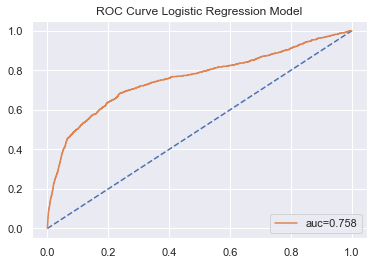

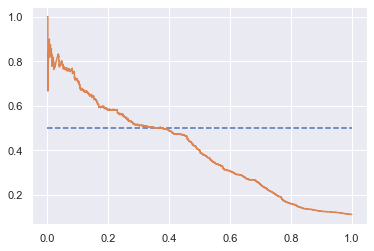

In [80]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0, solver = 'liblinear', max_iter=4000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print()

print(metrics.classification_report(y_test, y_pred))

y_pred_proba = logreg.predict_proba(X_test)[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr, tpr, label = 'auc=%.3f'% auc)
plt.title(label='ROC Curve Logistic Regression Model')
plt.legend(loc = 4)
plt.savefig('logregROC.png')
plt.show()

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)
ap = metrics.average_precision_score(y_test, y_pred_proba)

plt.plot([0,1],[0.5,0.5], linestyle = '--')
plt.plot(recall, precision)
plt.show()


In [81]:
import statsmodels.api as sm

logit_model = sm.Logit(target_var, data2)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.285826
         Iterations 8
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.188     
Dependent Variable:   yes              AIC:              23609.1652
Date:                 2020-10-28 21:06 BIC:              23885.1941
No. Observations:     41188            Log-Likelihood:   -11773.   
Df Model:             31               LL-Null:          -14499.   
Df Residuals:         41156            LLR p-value:      0.0000    
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                   Coef.   Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
age                 0.0026   0.0021   1.2655 0.2057 -0.0014  0.0067
campaign           -0.0421   0.0092  -4.5

C:\Users\xuanx\Miniconda3\envs\springboard1\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\xuanx\Miniconda3\envs\springboard1\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\xuanx\Miniconda3\envs\springboard1\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\xuanx\Miniconda3\envs\springboard1\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [82]:
cols = ['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
        'defaultenc', 'monthenc',
       'dayofweekenc', 'contact_method', 'previouscamp','educationenc']

newdata = data2[cols]


logit_model = sm.Logit(target_var, newdata)
result = logit_model.fit()
print(result.summary2(), file = f)

Optimization terminated successfully.
         Current function value: 0.287381
         Iterations 7


NameError: name 'f' is not defined

In [ ]:
f = open('logregfile', 'w')
print(f)

In [ ]:
logreg = LogisticRegression(random_state=0, solver = 'liblinear', max_iter=4000)
logreg.fit(X_train[cols], y_train)
y_pred = logreg.predict(X_test[cols])
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print(metrics.classification_report(y_test, y_pred))

y_pred_proba = logreg.predict_proba(X_test[cols])[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr, tpr, label = 'auc=%.3f'% auc)
plt.title(label='ROC Curve Logistic Regression Model')
plt.legend(loc = 4)
plt.show()

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)
ap = metrics.average_precision_score(y_test, y_pred_proba)

plt.plot([0,1],[0.5,0.5], linestyle = '--')
plt.plot(recall, precision)
plt.show()